# Clustering for multiple mouse embryo dataset

## Data preprocessing

In [ ]:
import stSCI
import scanpy as sc

sc_adata = sc.read('data/mouse_embyro/embryo_48_embryo_49.h5ad')
sc_adata.obs['cluster'] = sc_adata.obs['celltype_update']
sc_adata.var_names = sc_adata.var['gene_short_name'].astype(str)
st_adata = sc.read('data/mouse_embryo/embryo_e13.5.h5ad')
st_adata.obsm['spatial'] = st_adata.obsm['refined_spatial_3D']

sc.pp.highly_variable_genes(sc_adata, flavor='seurat_v3', n_top_genes=5000)
sc.pp.highly_variable_genes(st_adata, flavor='seurat_v3', n_top_genes=5000)
sc.pp.normalize_total(sc_adata, target_sum=1e4)
sc.pp.normalize_total(st_adata, target_sum=1e4)
sc.pp.log1p(sc_adata)
sc.pp.log1p(st_adata)

## Model training

Same as single slice clustering process, we use the function `stSCI.train()` function to learn the representation. For multi-slice clustering, stSCI can automatically identify the 3D spatial coordinates and run the training 3D pipeline.

In [2]:
sc_adata, st_adata = stSCI.train(sc_adata, st_adata, cluster_method='louvain', cluster_para=0.4, multi_slice_key='section', clustering=True)

>>> INFO: Filtered 756 genes.
>>> INFO: Find 2244 same HVGs, result data shapes: [(120811, 2244), (16418, 2244)].
>>> INFO: Generate 6902 edges, 6.000 edges per spot (0.00s).
>>> INFO: Generate 12691 edges, 6.000 edges per spot (0.01s).
>>> INFO: Generate 15708 edges, 6.000 edges per spot (0.01s).
>>> INFO: Generate 15498 edges, 6.000 edges per spot (0.01s).
>>> INFO: Generate 11956 edges, 6.000 edges per spot (0.00s).
>>> INFO: Generate 11802 edges, 6.000 edges per spot (0.00s).
>>> INFO: Generate 10374 edges, 6.000 edges per spot (0.01s).
>>> INFO: Generate 10556 edges, 6.000 edges per spot (0.01s).
>>> INFO: Generate 11767 edges, 6.000 edges per spot (0.01s).
>>> INFO: Generate 7672 edges, 6.000 edges per spot (0.00s).
>>> INFO: Generate 200942 multi-slice edges, 11.239 edges per spot (0.13s).
>>> INFO: Finish PCA (52.41s).
>>> INFO: Finish centroid generation (10.26s).
>>> INFO: Finish centroid generation (0.67s).


>>> Train stSCI: 100%|██████████| 500/500 [04:00<00:00,  2.08it/s]


>>> INFO: Train stSCI model (385.76s).


## Visualization

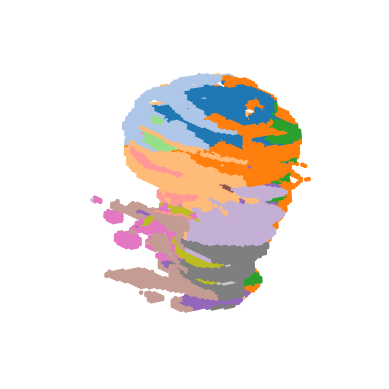

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from stSCI.utils.plot import get_palette

label = "cluster_result"
palette = get_palette(st_adata.obs[label].unique())
z = st_adata.obsm['spatial'][:, 0]
x = st_adata.obsm['spatial'][:, 1]
y = st_adata.obsm['spatial'][:, 2]
colors = [palette[s] for s in st_adata.obs[label]]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

fig = ax.scatter(xs=x, ys=y, zs=z, c=colors, s=5, alpha=1.0)

ax.azim = 100
ax.elev = 125

ax.set_axis_off()
plt.show()